Shape perimeter: 1167, hull perimeter: 1054, difference = 113
Mask is correct: True
79891.5


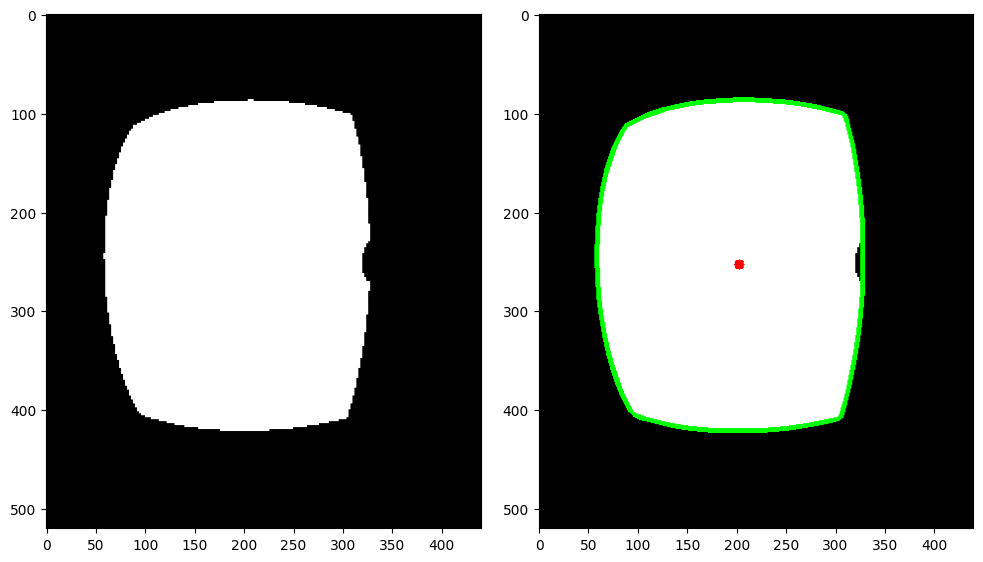

Shape perimeter: 1326, hull perimeter: 1117, difference = 209
Mask is correct: True
77674.5


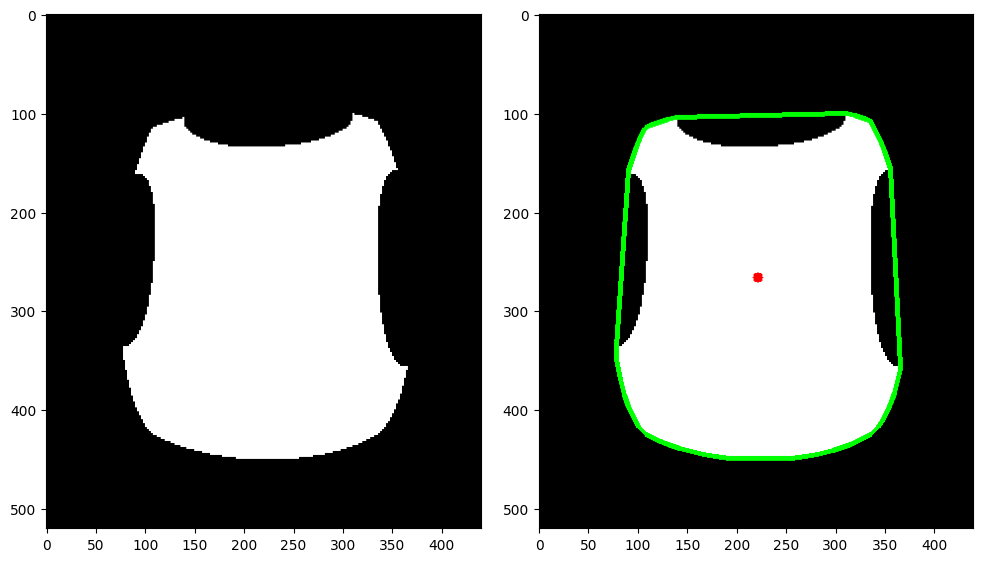

Shape perimeter: 1121, hull perimeter: 976, difference = 145
Mask is correct: True
63231.0


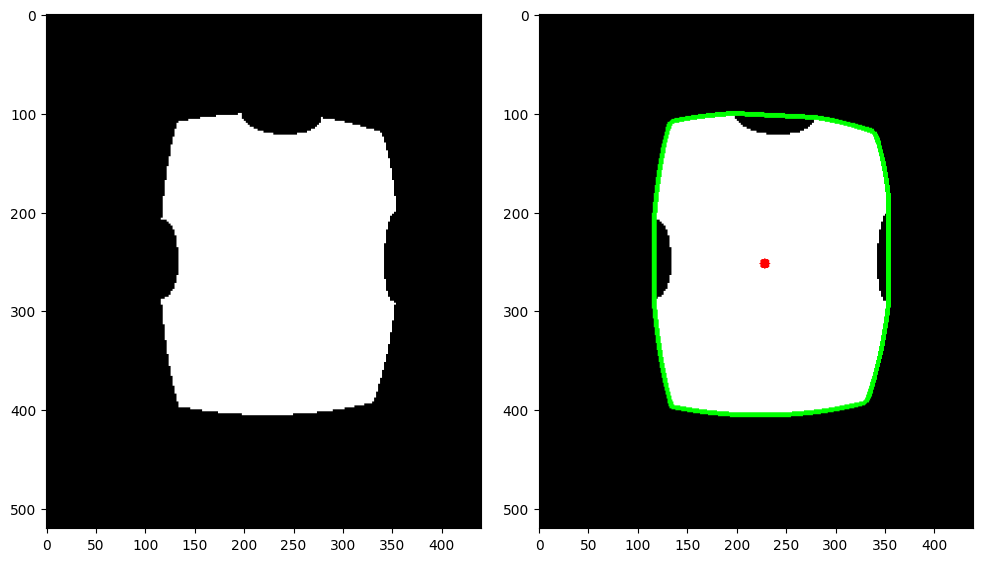

Shape perimeter: 1244, hull perimeter: 1042, difference = 202
Mask is correct: True
64483.5


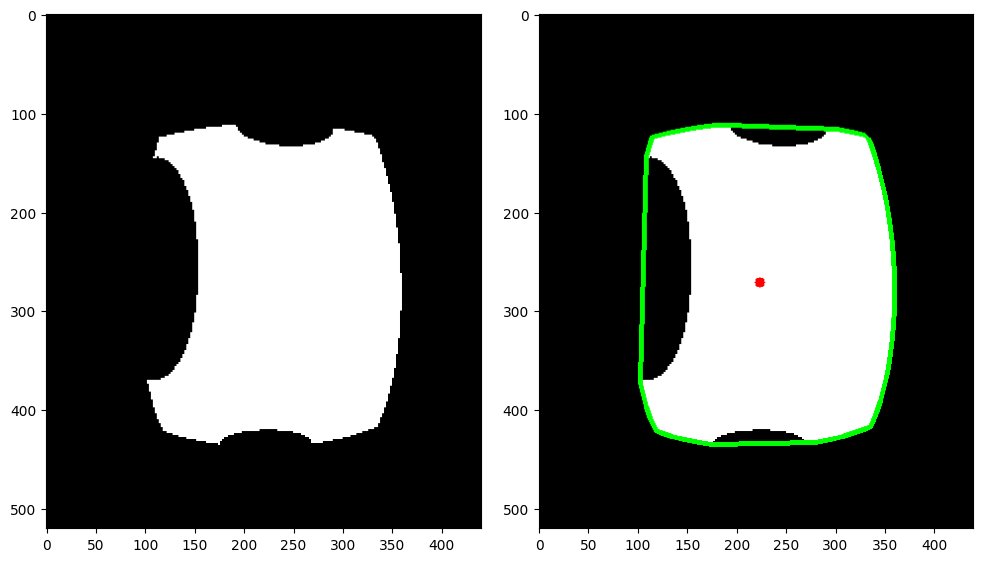

Shape perimeter: 2068, hull perimeter: 1048, difference = 1020
Mask is correct: False
63232.5


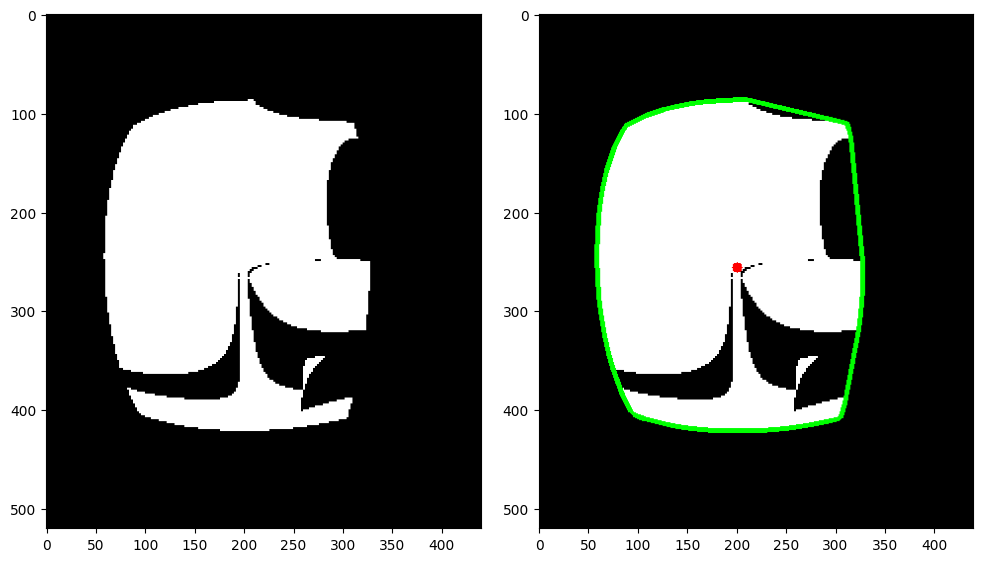

Mask is correct: False
13986.0
12407.5
5959.0
5587.5


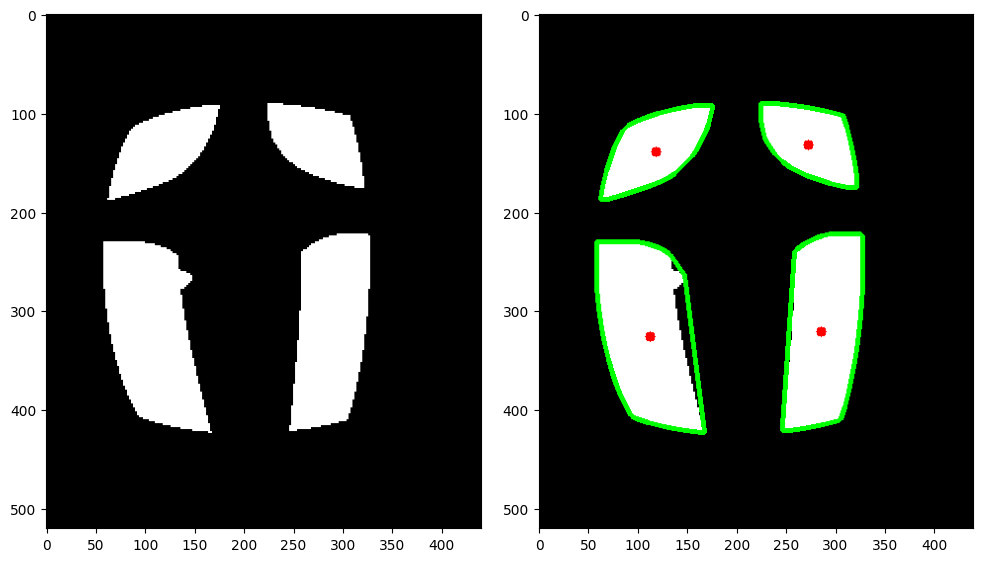

Mask is correct: False
5215.5
42951.5
562.0
1529.0


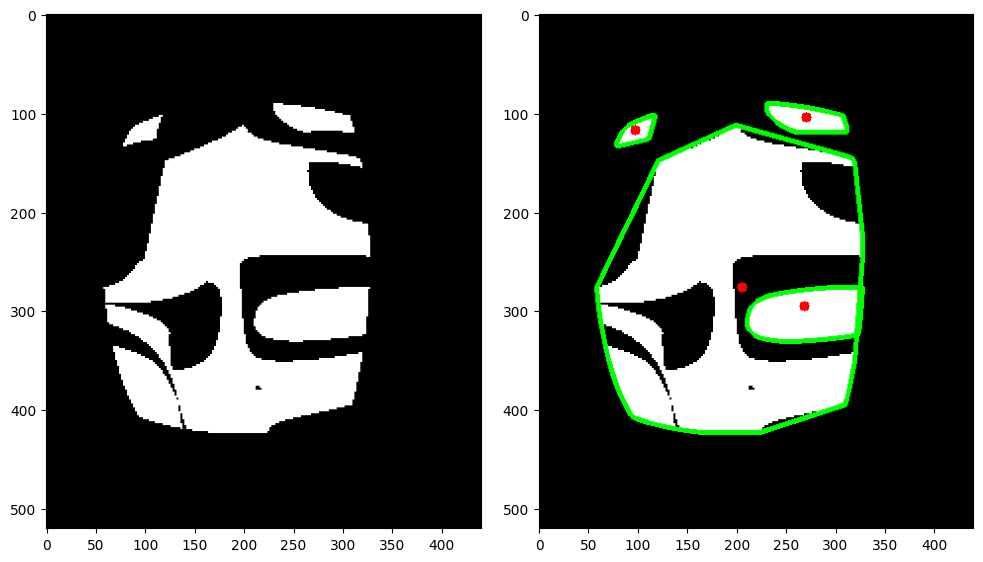

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def validate_mask(mask):
    mask_8u = np.uint8(mask)

    contours, _ = cv2.findContours(
        mask_8u, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) == 1:
        cnt = contours[0]
        perimeter = cv2.arcLength(cnt, True)
        hull = cv2.convexHull(cnt)
        hull_perimeter = cv2.arcLength(hull, True)
        perimeter_difference = perimeter - hull_perimeter
        print(
            f"Shape perimeter: {round(perimeter)}, hull perimeter: {round(hull_perimeter)}, difference = {round(perimeter_difference)}")
        return perimeter_difference < 500

    return False


def process_mask(path):

    mask = np.load(path)
    if np.max(mask) <= 1:
        mask = (mask * 255).astype(np.uint8)

    mask_8u = np.uint8(mask)

    print(f"Mask is correct: {validate_mask(mask)}")

    contours, _ = cv2.findContours(
        mask_8u, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    mask_result = cv2.cvtColor(mask_8u, cv2.COLOR_GRAY2RGB)

    for c in contours:
        print(cv2.contourArea(c))
        (x, y), _ = cv2.minEnclosingCircle(c)
        cv2.circle(mask_result, (int(x), int(y)), 0, (255, 0, 0), 10)
        hull = cv2.convexHull(c)
        cv2.drawContours(mask_result, [hull], 0, (0, 255, 0), 3)

    fig1, axs1 = plt.subplots(1, 2, figsize=(10, 15))

    fig1.tight_layout()

    axs1[0].imshow(mask, cmap='gray')

    axs1[1].imshow(mask_result, cmap='gray')

    plt.show()


process_mask("wip_dataset/correct_hydra_3.npy")
process_mask("wip_dataset/correct_hydra_4.npy")
process_mask("wip_dataset/correct_hub_1.npy")
process_mask("wip_dataset/correct_hub_5.npy")
process_mask("wip_dataset/wrong_hydra_3.npy")
process_mask("wip_dataset/wrong_hydra_2.npy")
process_mask("wip_dataset/wrong_hydra_1.npy")